In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
scores = pd.DataFrame(
    columns=['confusion matrix', 'accuracy', 'precision', 'recall'],
    index=[
        'LogisticRegression',
        'SVC linear',
        'SVC gauss',
        'KNeighborsClassifier',
        'MLP'
    ]
)
scores

,confusion matrix,accuracy,precision,recall
LogisticRegression,NaN,NaN,NaN,NaN
SVC linear,NaN,NaN,NaN,NaN
SVC gauss,NaN,NaN,NaN,NaN
KNeighborsClassifier,NaN,NaN,NaN,NaN
MLP,NaN,NaN,NaN,NaN


Загрузите данные о диагностике сахарного диабета

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 
             'insulin', 'bmi', 'pedigree', 'age', 'label']
dtypes = {
    'pregnant' : 'int',
    'glucose' : 'int',
    'bp' : 'int',
    'skin' : 'int',
    'insulin' : 'int',
    'bmi' : 'float',
    'pedigree' : 'float',
    'age' : 'int',
    'label' : 'int',
}

pima = pd.read_csv('diabetes.csv', header=0, names=col_names, dtype=dtypes)

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
Y = pima.label
X = pima.drop(['label'], axis=1)

Разделите эти данные на тестовую и обучающую выборки

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

Постройте модель классификации для определения заболевания

In [7]:
cls = LogisticRegression()

In [8]:
cls.fit(x_train, y_train)

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
y_pred = cls.predict(x_test)

In [10]:
scores.iloc[0,0] = metrics.confusion_matrix(y_test, y_pred)
scores.iloc[0,0]

array([[89, 10],
       [24, 31]], dtype=int64)

Text(0.5, 15.0, 'Предсказанные значения')

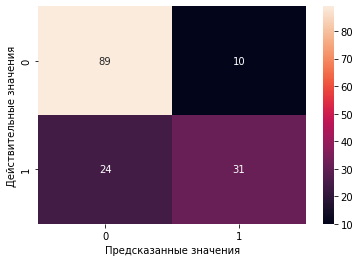

In [11]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Оцените качество модели на тестовой выборке с помощью следующих метрик

достоверность предсказания (accuracy)

тупа доля правильных ответов из выборки, по графику видно, что это (89+31)/(89+31+10+24)

In [12]:
scores.iloc[0,1] = metrics.accuracy_score(y_test, y_pred)
scores.iloc[0,1]

0.7792207792207793

In [5]:
31/55

0.5636363636363636

точность (precision)

Доля реально правильных ответов из всех, которые алгоритм выделил как правильные

На графике это 31/(31+10)

In [13]:
scores.iloc[0,2] = metrics.precision_score(y_test, y_pred)
scores.iloc[0,2]

0.7560975609756098

полнота (recall)

Другая сторона медали от precision

Доля найденных правильных ответов из доли реально всех правильных ответов

На графике это 31/(31+24)

In [14]:
scores.iloc[0,3] = metrics.recall_score(y_test, y_pred)
scores.iloc[0,3]

0.5636363636363636

Сделайте вывод о применимости модели

То есть реально модель предскажет рак у 56% пациентов, у которых он реально будет, а 44% пациентов с раком будут классифицированы как здоровые

Или же (но это гораздо менее важно, так как в этом случае не будет (практически, в такой же степени) негативных последствий) можно узнать, что из всех пациентов, которым модель предсказала отсутствие рака, его реально не будет у 89/99 пациентов. То есть вроде бы показатель неплохой (уже ближе к 100%, чем к 50%), но те (10/99, примерно 10%), которым предсказали рак, хотя у них его не было, не пострадают от этого, а лишь пройдут обследование. А вот те 44%, у которых рак (который на ранней стадии можно лечить куда более успешно) не был предсказан, но был реально, вот они действительно пострадают, поэтому вряд ли можно считать такую модель успешной.

Для статистики раком более (в тестовой выборке) (24+31)/(24+31+89+10)=35%, если наугад сказать половине, что они больны, а другой, что здоровы, окажется, что мы предсказали рак у 50% пациентов, а наша модель у 56%. Значения не сильно отличаются.

In [15]:
scores

,confusion matrix,accuracy,precision,recall
LogisticRegression,"[[89, 10], [24, 31]]",0.779221,0.756098,0.563636
SVC linear,NaN,NaN,NaN,NaN
SVC gauss,NaN,NaN,NaN,NaN
KNeighborsClassifier,NaN,NaN,NaN,NaN
MLP,NaN,NaN,NaN,NaN


# доп задания

In [16]:
def get_metrics(y_test, y_pred, average):
    matrix = metrics.confusion_matrix(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average=average)
    recall = metrics.recall_score(y_test, y_pred, average=average)
    return pd.Series(
        (matrix, accuracy, precision, recall),
        index=['confusion matrix', 'accuracy', 'precision', 'recall']
    )
 

In [17]:
def model_and_metrics(model, average="binary"):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  
    returned = get_metrics(y_test, y_pred, average=average)
    %matplotlib inline
    class_names = [0, 1]
    fig, ax = plt.subplots()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)
    sns.heatmap(pd.DataFrame(
        returned['confusion matrix']),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()  
    return returned

## Используйте метод опорных векторов для построения альтернативной модели предсказания диабета

### метод опорных векторов с линейным ядром (SVC)

In [18]:
from sklearn import svm

In [19]:
clf = svm.SVC(kernel='linear')

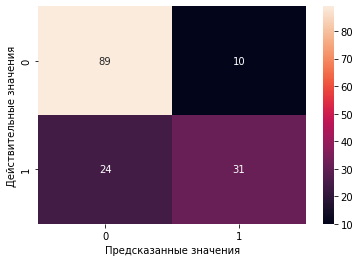

In [20]:
scores.iloc[1] = model_and_metrics(clf)

### метод опорных векторов с гауссовым ядром (SVC)

In [21]:
clf_rbf = svm.SVC(kernel='rbf')

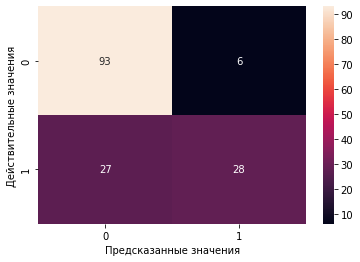

In [22]:
scores.iloc[2] = model_and_metrics(clf_rbf)

### метод k ближайших соседей (KNeighborsClassifier);

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
neigh = KNeighborsClassifier(weights='distance')

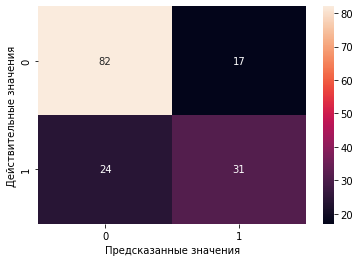

In [25]:
scores.iloc[3] = model_and_metrics(neigh)

### многослойный перцептрон (MLP)

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
mlp = MLPClassifier()

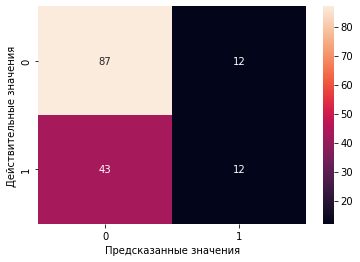

In [28]:
scores.iloc[4] = model_and_metrics(mlp)

### Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую

In [29]:
scores

,confusion matrix,accuracy,precision,recall
LogisticRegression,"[[89, 10], [24, 31]]",0.779221,0.756098,0.563636
SVC linear,"[[89, 10], [24, 31]]",0.779221,0.756098,0.563636
SVC gauss,"[[93, 6], [27, 28]]",0.785714,0.823529,0.509091
KNeighborsClassifier,"[[82, 17], [24, 31]]",0.733766,0.645833,0.563636
MLP,"[[87, 12], [43, 12]]",0.642857,0.5,0.218182


### Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.

In [30]:
from sklearn.model_selection import learning_curve

In [31]:
def show_statisctic(reg, x=X, y=Y, train_sizes=np.linspace(0.1, 1, 10), cv=5, average='binary'):
    plt.figure()
    
    for scoring, color in zip(["accuracy", "precision", "recall"], ["r", "g", "b"]):
        train_sizes, _, test_scores = learning_curve(
            reg,
            x,
            y,
            train_sizes=train_sizes,
            scoring=scoring,
            cv=cv,
        )
        plt.plot(train_sizes, test_scores.mean(1), "o--", color=color, label=scoring)
        
    plt.xlabel("Train size")
    plt.ylabel("score")
    plt.title("Learning curves")
    plt.legend(loc="best")
    plt.show()

### Логистическая регрессия (LogisticRegression)

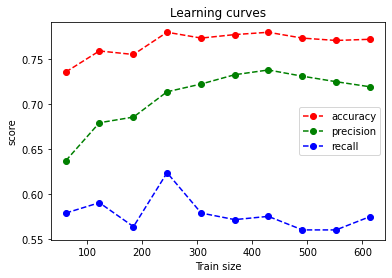

In [32]:
show_statisctic(LogisticRegression(max_iter=1000, C=20))

### Метод опорных векторов с линейным ядром (SVC)

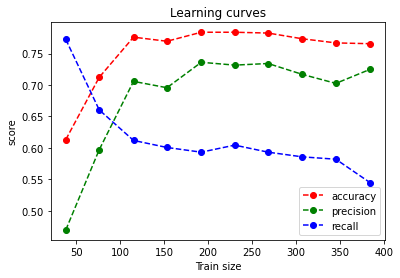

In [33]:
show_statisctic(svm.SVC(kernel='linear', C=10), cv=2)

### Метод опорных векторов с гауссовым ядром (SVC)

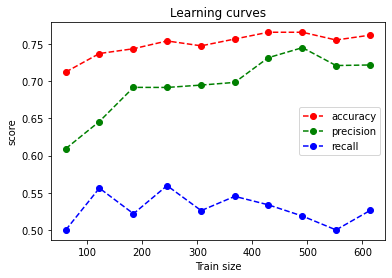

In [34]:
show_statisctic(svm.SVC(kernel='rbf', C=15), cv=5)

### Метод k ближайших соседей (KNeighborsClassifier)

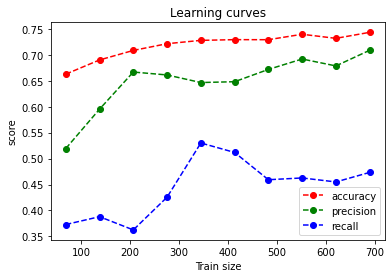

In [35]:
show_statisctic(KNeighborsClassifier(n_neighbors=10), cv=10)

### Многослойный перцептрон (MLP)

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\neural_netwo

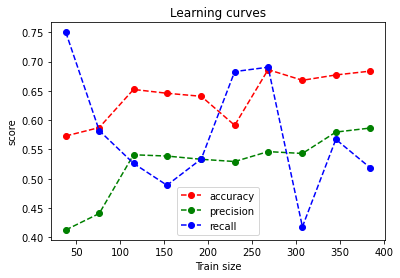

In [36]:
show_statisctic(MLPClassifier(max_iter=1000, hidden_layer_sizes=(300,20)), cv=2)

### Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [38]:
from sklearn.datasets import  load_iris
iris = load_iris()
X2 = iris.data
Y2 = iris.target

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, 
                                                    test_size=0.2,
                                                    random_state=True)

In [40]:
def scorer_precision(estimator, x, y):
    y_pred = estimator.predict(x)
    return metrics.precision_score(y, y_pred, average='weighted', zero_division=0)
    
def scorer_recall(estimator, x, y):
    y_pred = estimator.predict(x)
    return metrics.recall_score(y, y_pred, average='weighted', zero_division=0)
    
def show_statisctic(reg, x=X, y=Y, train_sizes=np.linspace(0.1, 1, 10), cv=5):
    plt.figure()
    
    for name, scoring, color in zip(
        ["accuracy","precision", "recall"],
        ["accuracy", scorer_precision, scorer_recall],
        ["r", "g", "b"]
    ):
        
        train_sizes, _, test_scores = learning_curve(
            reg,
            x,
            y,
            train_sizes=train_sizes,
            scoring=scoring,
            cv=cv,
        )
        test_scores[np.isnan(test_scores)] = 0
        plt.plot(train_sizes, test_scores.mean(1), "o--", color=color, label=name)
        
    plt.xlabel("Train size")
    plt.ylabel("score")
    plt.title("Learning curves")
    plt.legend(loc="best")
    plt.show()

### Логистическая регрессия (LogisticRegression)

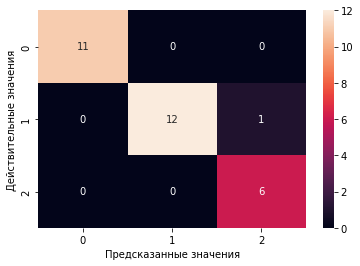

confusion matrix    [[11, 0, 0], [0, 12, 1], [0, 0, 6]]
accuracy                                       0.966667
precision                                      0.971429
recall                                         0.966667
dtype: object

In [41]:
cls = LogisticRegression(max_iter=1000)
model_and_metrics(cls, average='weighted')

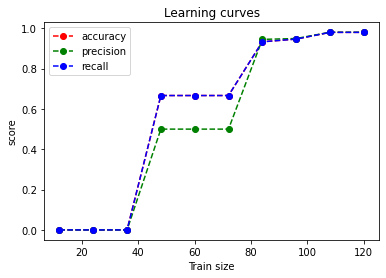

In [42]:
show_statisctic(LogisticRegression(max_iter=1000, C=20), X2, Y2)

### Метод опорных векторов с линейным ядром (SVC)

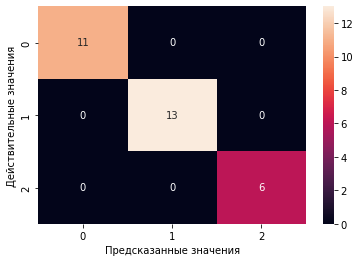

confusion matrix    [[11, 0, 0], [0, 13, 0], [0, 0, 6]]
accuracy                                            1.0
precision                                           1.0
recall                                              1.0
dtype: object

In [43]:
clf_linear = svm.SVC(kernel='linear')
model_and_metrics(clf_linear, average='weighted')

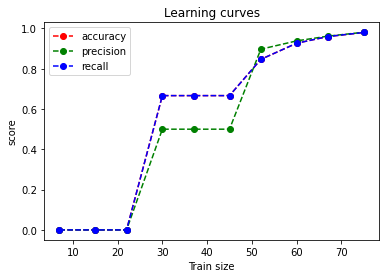

In [52]:
show_statisctic(svm.SVC(kernel='linear', C=10), X2, Y2, cv=2)

### Метод опорных векторов с гауссовым ядром (SVC)

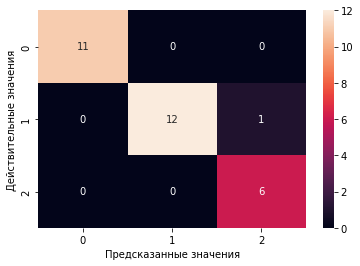

confusion matrix    [[11, 0, 0], [0, 12, 1], [0, 0, 6]]
accuracy                                       0.966667
precision                                      0.971429
recall                                         0.966667
dtype: object

In [45]:
clf_rbf = svm.SVC(kernel='rbf')
model_and_metrics(clf_rbf, average='weighted')

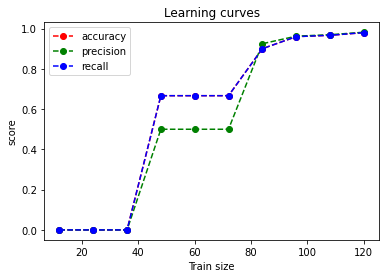

In [53]:
show_statisctic(svm.SVC(kernel='rbf', C=15), X2, Y2, cv=5)

### Метод k ближайших соседей (KNeighborsClassifier)

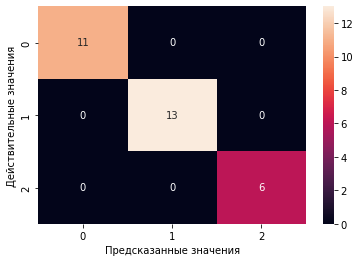

confusion matrix    [[11, 0, 0], [0, 13, 0], [0, 0, 6]]
accuracy                                            1.0
precision                                           1.0
recall                                              1.0
dtype: object

In [47]:
neigh = KNeighborsClassifier(weights='distance')
model_and_metrics(neigh, average='weighted')

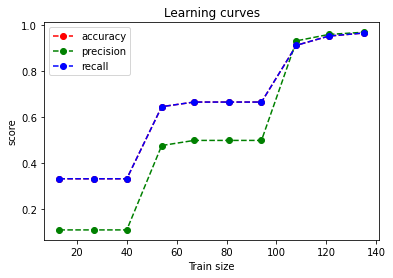

In [54]:
show_statisctic(KNeighborsClassifier(n_neighbors=10), X2, Y2, cv=10)

### Многослойный перцептрон (MLP)

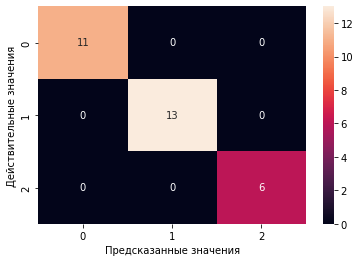

confusion matrix    [[11, 0, 0], [0, 13, 0], [0, 0, 6]]
accuracy                                            1.0
precision                                           1.0
recall                                              1.0
dtype: object

In [49]:
mlp = MLPClassifier(max_iter=1000)
model_and_metrics(mlp, average='weighted')

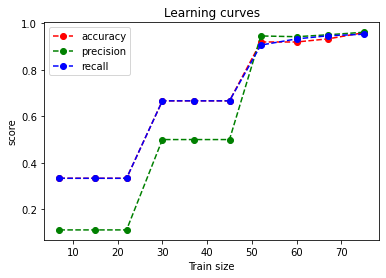

In [55]:
show_statisctic(MLPClassifier(max_iter=1000, hidden_layer_sizes=(300,20)), X2, Y2, cv=2)